In [15]:
import pandas as pd

In [18]:
df = pd.read_pickle('/root/Sefaria-Project/ML/data/stem_top_ten_single_topics_df.pkl')

In [19]:
df.head()

,En,Topics
3,modifi mean board refer uniqu name modifi even...,dinei-haget
11,hand katafr explan hand slant obvious readi re...,dinei-haget
67,similar two basket untith fruit front first da...,laws-of-holidays
118,mishna state one ate food prepar festiv eiruv ...,laws-of-holidays
131,one may mix water salt oil dip one bread put c...,rabbinically-forbidden-activities-on-shabbat


In [22]:
df['category_id'] = df['Topics'].factorize()[0]
from io import StringIO
category_id_df = df[['Topics', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Topics']].values)

In [23]:
df.head()

,En,Topics,category_id
3,modifi mean board refer uniqu name modifi even...,dinei-haget,0
11,hand katafr explan hand slant obvious readi re...,dinei-haget,0
67,similar two basket untith fruit front first da...,laws-of-holidays,1
118,mishna state one ate food prepar festiv eiruv ...,laws-of-holidays,1
131,one may mix water salt oil dip one bread put c...,rabbinically-forbidden-activities-on-shabbat,2


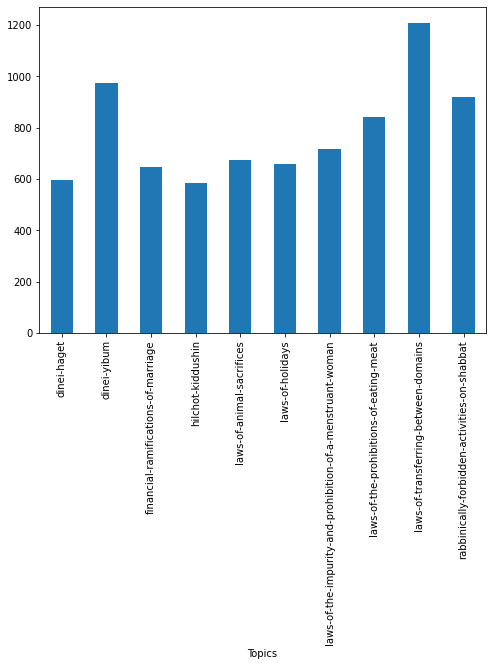

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Topics').En.count().plot.bar(ylim=0)
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.En).toarray()
labels = df.category_id
features.shape

(7828, 11373)

In [40]:
df.to_pickle('/root/Sefaria-Project/ML/data/top_ten_categorized_df.pkl')

In [31]:

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Topic, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Topic))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'dinei-haget':
  . Most correlated unigrams:
       . write
       . divorc
  . Most correlated bigrams:
       . wit sign
       . write divorc
# 'dinei-yibum':
  . Most correlated unigrams:
       . brother
       . levir
  . Most correlated bigrams:
       . perform alitza
       . levir marriag
# 'financial-ramifications-of-marriage':
  . Most correlated unigrams:
       . properti
       . contract
  . Most correlated bigrams:
       . payment marriag
       . marriag contract
# 'hilchot-kiddushin':
  . Most correlated unigrams:
       . condit
       . betroth
  . Most correlated bigrams:
       . betroth betroth
       . said betroth
# 'laws-of-animal-sacrifices':
  . Most correlated unigrams:
       . altar
       . offer
  . Most correlated bigrams:
       . sin offer
       . burnt offer
# 'laws-of-holidays':
  . Most correlated unigrams:
       . holiday
       . festiv
  . Most correlated bigrams:
       . day holiday
       . cover blood
# 'laws-of-the-impurity-and-prohi